<a href="https://colab.research.google.com/github/Akshaynair47/SCT_ML_4/blob/main/HandGestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 2.13G/2.13G [00:25<00:00, 88.8MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1
Directory exists: True
Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 746s 739ms/step - accuracy: 0.4970 - loss: 0.9641 - val_accuracy: 0.4961 - val_loss: 0.7019
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 742s 742ms/step - accuracy: 0.4979 - loss: 0.7039 - val_accuracy: 0.4913 - val_loss: 0.6975
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 801s 802ms/step - accuracy: 0.4955 - loss: 0.6990 - val_accuracy: 0.5081 - val_loss: 0.6942
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 813s 811ms/step - accuracy: 0.4999 - loss: 0.6959 - val_accuracy: 0.5008 - val_loss: 0.6937
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 750s 750ms/step - accuracy: 0.4983 - loss: 0.6952 - val_accuracy: 0.4994 - val_loss: 0.6942
Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2181s 2s/step - accuracy: 0.4985 - loss: 0.6933 - val_accuracy: 0.4966 - val_loss: 0.6931
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2196s 2s/step - accuracy: 0.5009 - loss: 0.6931 - val_accuracy: 0.4965 - val_loss: 0.6933
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2135s 2s/step - accuracy: 0.5006

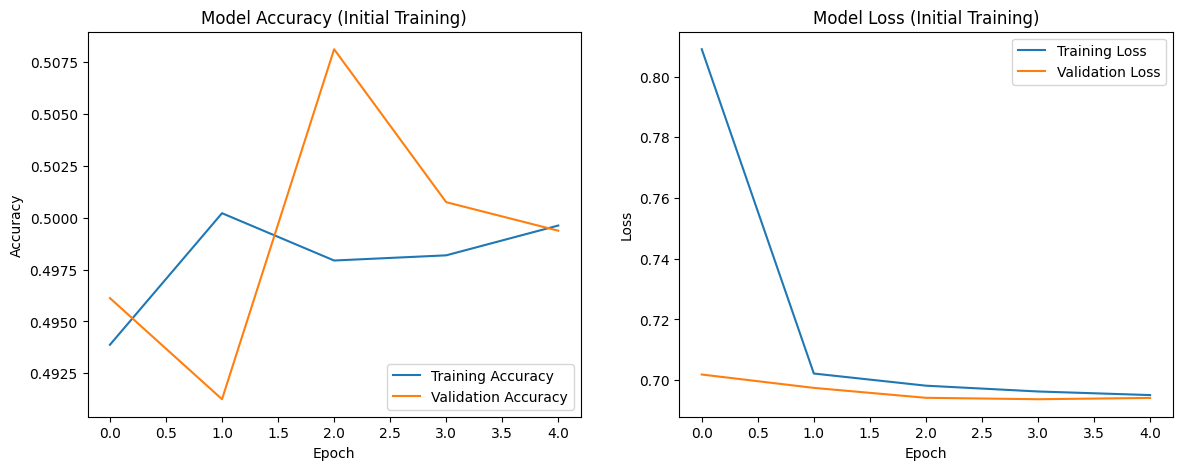

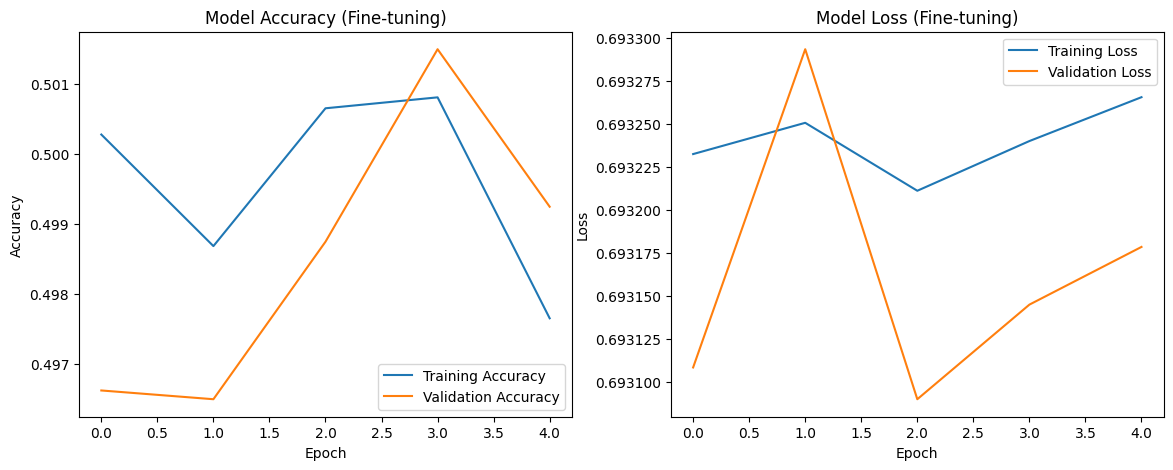

In [ ]:
import kagglehub

path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

import os

dataset_path = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1'
print("Directory exists:", os.path.exists(dataset_path))
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2


dataset_path =  '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1'

image_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

model.save('/content/hand_symbol_model.h5')

import matplotlib.pyplot as plt

def plot_history(history, title_suffix=""):

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()


plot_history(history, title_suffix="(Initial Training)")


plot_history(history_fine, title_suffix="(Fine-tuning)")






def plot_history(history, title_suffix=""):

    plt.figure(figsize=(8, 4))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
